# 결정 트리 (DecisionTree)

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>max_depth</code></td>
      <td>
        트리의 최대 깊이를 규정 (디폴트: None) <br>
        None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 <code>min_samples_split</code>보다 작아질 때까지 계속 깊이를 증가시킴 <br>
        깊이가 길어지면 <code>min_samples_split</code> 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
      </td>
    </tr>
    <tr>
      <td><code>max_features</code></td>
      <td>
        최적의 분할을 위해 고려할 최대의 피처 개수 (디폴트: None / 데이터셋의 모든 피처를 사용해 분할 수행)
        <ul>
          <li><code>int</code> 형으로 지정하면 대상 피처의 개수, <code>float</code> 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트</li>
          <li><code>'sqrt'</code>는 전체 피처 중 sqrt(전체 피처 개수) 즉, 전체 피처 개수의 제곱근만큼 선택</li>
          <li><code>'auto'</code>로 지정하면 sqrt와 동일</li>
          <li><code>'log'</code>는 전체 피처 중 log2(전체 피처 개수) 선택</li>
          <li><code>'None'</code>은 전체 피처 선택</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td><code>min_samples_split</code></td>
      <td>
        노드 분할을 위한 최소 samples (디폴트 : <code>min_samples_split=2</code> == 부모노드의 sample수가 2 이상인 경우 분할, 자식노드의 sample수가 2이하일 수 있음) <br>
        작게 설정할 수록 과적합 가능성 증가
      </td>
    </tr>
    <tr>
      <td><code>min_samples_leaf</code></td>
      <td>
        분할 이후 만족시켜야 할 sample 최소 개수 (<code>min_samples_leaf=2</code>일 때, 분할 이후 자식노드의 sample수가 2개 이상이 된다면 부모노드를 분할) <br>
        작게 설정할수록 과적합 가능성 증가
      </td>
    </tr>
    <tr>
      <td><code>max_leaf_nodes</code></td>
      <td>분할 이후 leaf_node 최대개수</td>
    </tr>
    <tr>
      <td><code>criterion</code></td>
      <td>
        분할을 위해 사용할 성능 평가 지표 설정 <br>
        <code>gini</code> 또는 <code>entropy</code> 값을 사용할 수 있으며, <code>gini</code>는 지니 계수를, <code>entropy</code>는 정보 이득을 기반으로 분할 기준을 결정
      </td>
    </tr>
    <tr>
      <td><code>min_weight_fraction_leaf</code></td>
      <td>
        리프 노드가 전체 가중치에서 차지해야 하는 최소 비율 (디폴트: 0) <br>
        특정 클래스의 데이터가 지나치게 적은 경우 과적합을 방지하기 위해 사용
      </td>
    </tr>
  </tbody>
</table>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DecisionTreeClassifier (분류)

### Wine 이진 분류
- 와인 품질 데이터셋을 가공 > 레드/화이트 와인 이진분류 데이터셋
    - 0: 레드
    - 1: 화이트

In [ ]:
wine_df = pd.read_csv('./data/wine_simple.csv')
display(wine_df.head(2))
print(wine_df.info())
print(wine_df.describe())

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None
           alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000


In [ ]:
# 데이터 분리 및 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# train-test split
X = wine_df.drop('class', axis =1)
y = wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# Scaling (decision tree는 근데 특성값의 scaling 영향을 거의 받지 않음 -> 분류로 하기 때문에)
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)


' \nstd_scaler = StandardScaler()\nX_train = std_scaler.fit_transform(X_train)\nX_test = std_scaler.transform(X_test)\n'

In [56]:
# 모델 학습 및 평가
from sklearn.tree import DecisionTreeClassifier

# 여기서 random _state를 하는 이유는 안하면 매번 (미세하게) 다른 기준으로 노드를 만들어서
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3) 
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train,y_train), dt_clf.score(X_test, y_test)
#print(dt_clf.get_depth())

(0.8433908045977011, 0.8584615384615385)

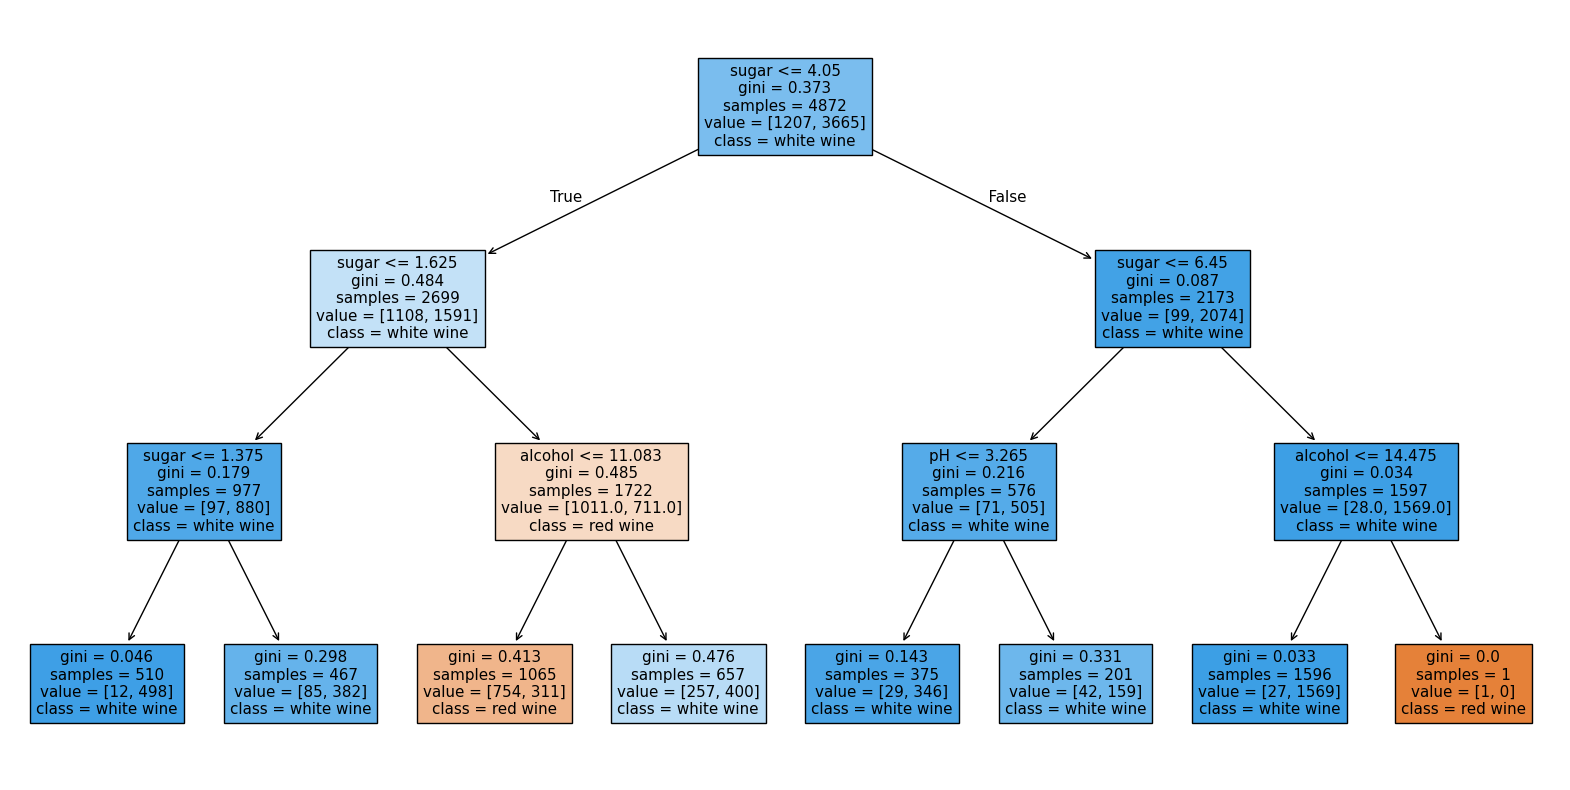

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_clf,
    filled=True, # 색깔 (진한 정도로 비율 나타냄)
    feature_names=X.columns,
    class_names=['red wine', 'white wine'],
    #max_depth=3
)
plt.savefig('wine_sample.png')
plt.show()

In [58]:
# 첫번쨰 leaf node gini impurity 계산해보기

1 - ((12/510)**2 + (498/510)**2) # 0.04595155709342569 ~= 0.045

0.04595155709342569

In [ ]:
# [alchoal, sugar, pH]
dt_clf.feature_importances_

array([0.11483515, 0.87892904, 0.00623581])

## DecisionTreeClassifier 다중분류

In [84]:
# 데이터 로드 및 분리
from sklearn.datasets import load_iris

# dictionary
iris_data = load_iris()
iris_data.keys()

# input 데이터: [num1, num2, num3, num4] => 밑이랑 연결
#print(iris_data.data)
# 특성명  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#print(iris_data.feature_names)
# label 데이터 (정답 데이터): 0/1/2
#print(iris_data.target)
# label 명 ['setosa' 'versicolor' 'virginica']
print(iris_data.target_names)

X = iris_data.data
y = iris_data.target

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

['setosa' 'versicolor' 'virginica']


In [85]:
# 모델 학습 및 평가 
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.9821428571428571, 0.9736842105263158)

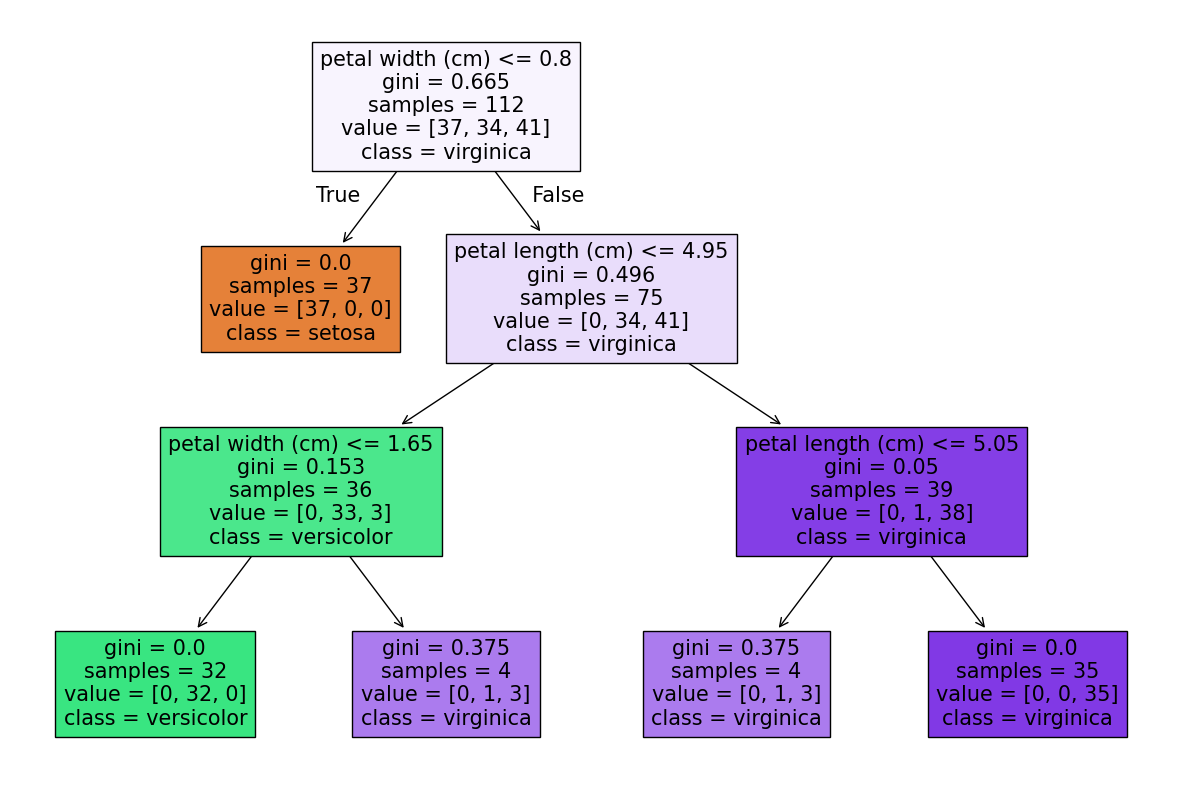

In [ ]:
# 트리모델 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(
    dt_clf,
    filled=True, # 색깔 (진한 정도로 비율 나타냄)
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names, 
    #max_depth=3
)
plt.savefig('iris_dt.png')
plt.show()

In [ ]:
# Gini impurity 감소에 기여한만큼 중요도가 높아짐
print(iris_data.feature_names)
print(dt_clf.feature_importances_)
# 결과를 보면 'selap length'하고 'sepal width'는 중요도가 낮은 것을 볼 수 있음

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.         0.42232109 0.57767891]


내가 도출한 인사이트:
- petal_width가 0.8 보다 작으면 전부 setosa 로 분리가 되는 걸 볼 수 있습니다. (분류하기가 매우 쉽다.)
- setosa 클래스가 한 번에 gini 불순도 = 0으로 리프 노드에 분류되었다.
- sample이 4개여도 리프 노드가 분류되는 것이 있다. (최소 샘플 수가 작은 것으로 추정)
- 꽃잎 너비가 가장 큰 영향을 받는다.
- sepal 특징은 꽃을 구분하는데 관련이 없다.

## DecisionTreeRegression (회귀)

In [98]:
from sklearn.datasets import fetch_california_housing

house_data = fetch_california_housing()
print(house_data.feature_names)
print(house_data.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [99]:
X_train, X_test, y_train, y_test = train_test_split(house_data.data, house_data.target, random_state=0)

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=5)
dt_reg.fit(X_train, y_train)

pred_train = dt_reg.predict(X_train)
pred_test = dt_reg.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f"Train MSE: {mse_train},\t Train R2: {r2_train}")
print(f"Test MSE: {mse_test},\t Test R2: {r2_test}")

Train MSE: 0.48180527258969713,	 Train R2: 0.6390020663235397
Test MSE: 0.5394412402644339,	 Test R2: 0.5919045479347868


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[0.77356004 0.05235279 0.03027554 0.         0.00548113 0.12074295
 0.0166861  0.00090146]


<Axes: >

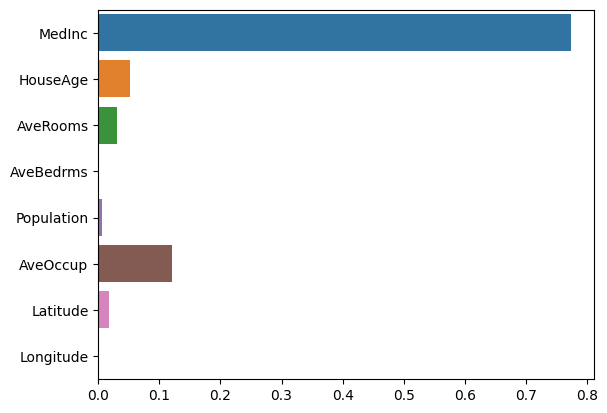

In [128]:
print(house_data.feature_names)
print(dt_reg.feature_importances_)

sns.barplot(
    x=dt_reg.feature_importances_,
    y=house_data.feature_names,
    hue= house_data.feature_names
)

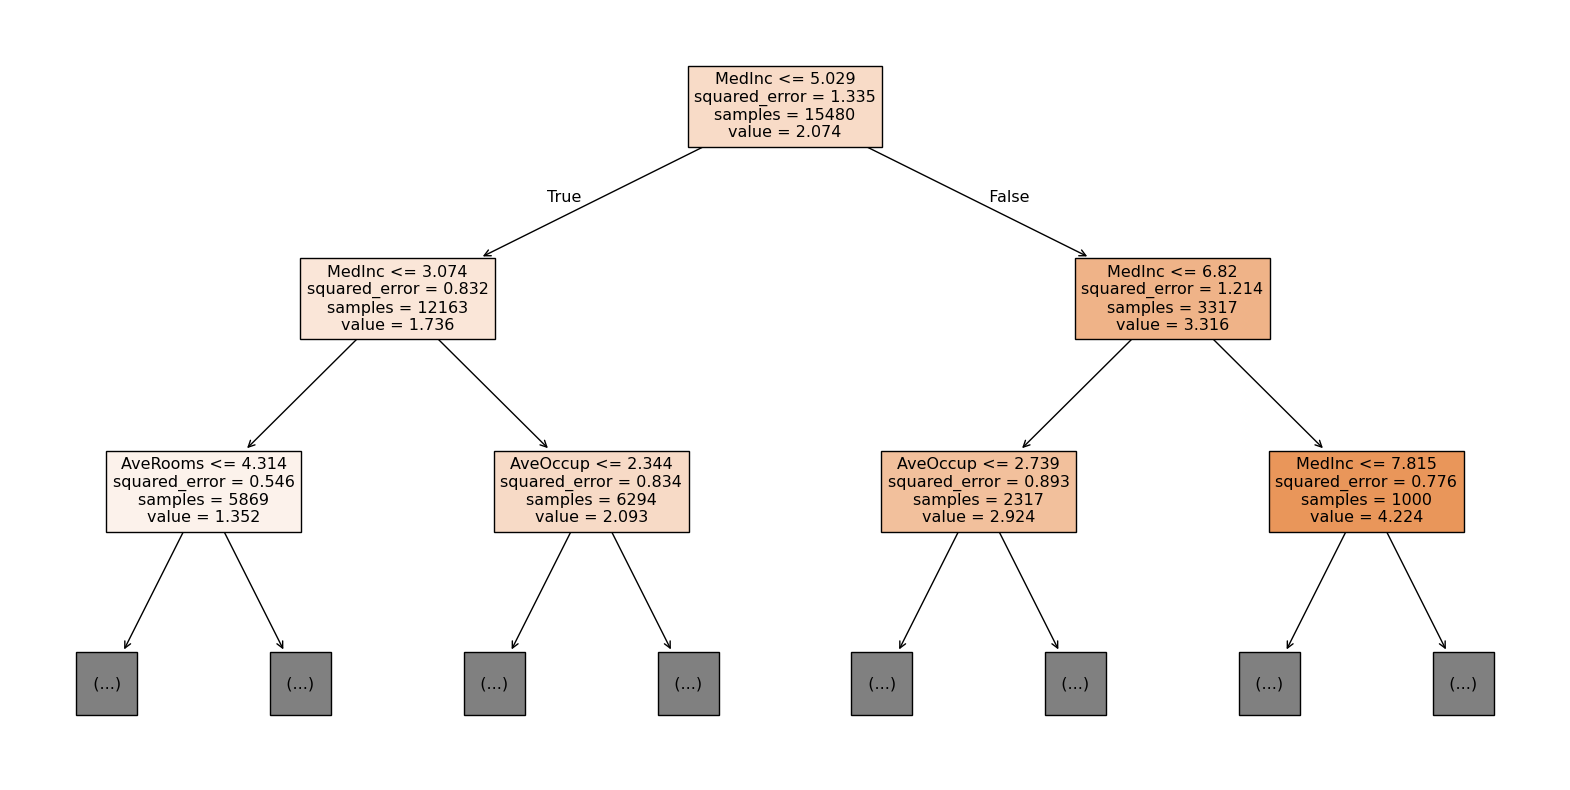

In [130]:
# 트리모델 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    dt_reg,
    filled=True, 
    feature_names=house_data.feature_names,
    #class_names=house_data.target_names, # 회귀 문제니까 보여줄 클래스 같은 것은 없음
    max_depth=2
)
plt.savefig('iris_dt.png')
plt.show()